# Intro to Data Visualization with Python

# Contents
1. Import libraries
2. Import datasets
3. Check imported data
4. Plot charts
5. Export dataframe

# 1. Import libraries

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing datasets

In [7]:
#Define the project path as a string and assign to a variable called path
path = r'/Users/davidgriesel/Documents/0 - CareerFoundry/02 - Data Analytics Immersion/04 - Python Fundamentals for Data Analysts/Instacart Basket Analysis - IC 202409'

In [8]:
#Import the orders dataset
df_final_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '09_final_merged.pkl'))

# 3. Check imported data

In [10]:
#Get the dimensions of the dataframe
df_final_merged.shape

(32404859, 33)

In [11]:
#Display the first 5 rows of the dataframe
df_final_merged.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 4. Plot charts

## 4.1. Bar Chart (frequency - 'orders_day_of_week')

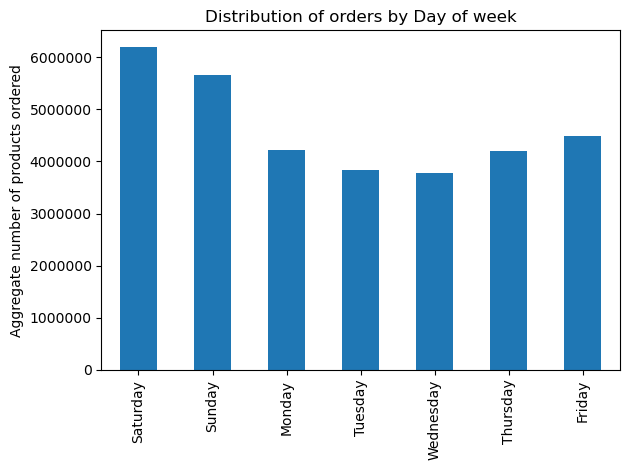

In [14]:
#Create bar chart of the frequency of variable values sorted by value
bar_orders_dow = df_final_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Define the labels for the days of the week
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Set the x-axis tick labels to the day names
bar_orders_dow.set_xticklabels(day_labels)

#Set the title
plt.title('Distribution of orders by Day of week')

#Rename axis
plt.xlabel('') 
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

## 4.2. Scatterplot ('prices')

##### Updated outliers during consistency checks

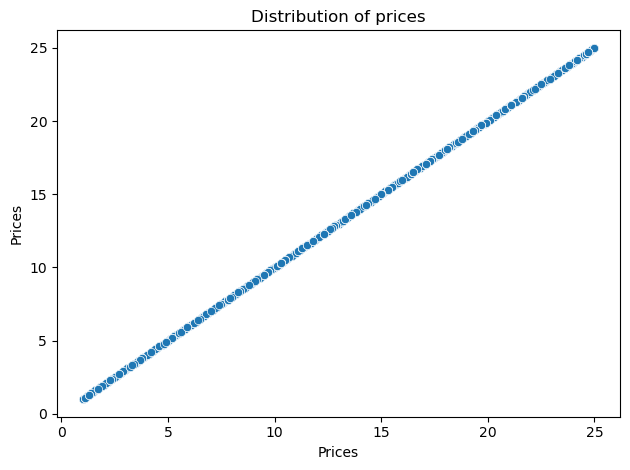

In [17]:
#Create a scatterplot of price frequency
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_final_merged)

#Set the title
plt.title('Distribution of prices')

#Rename axis
plt.xlabel('Prices')  
plt.ylabel('Prices')  

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
#df_final_merged.loc[df_final_merged['prices'] > 100]

In [19]:
#df_final_merged.loc[df_final_merged['prices'] >100, 'prices'] = np.nan

In [20]:
#df_final_merged['prices'].max()

## 4.3. Histogram (frequency 'prices')

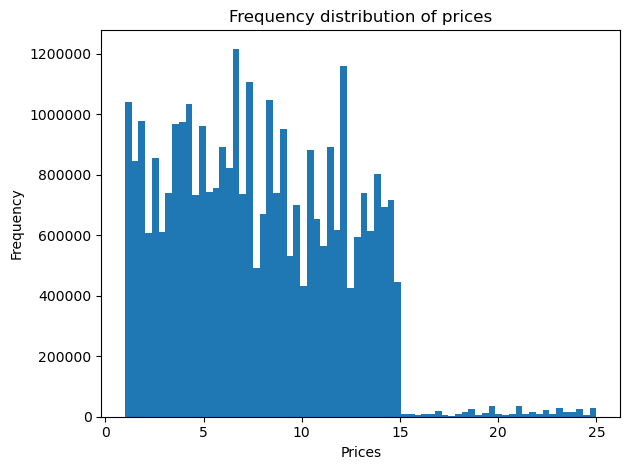

In [22]:
#Create a histogram of price frequency
histogram_prices = df_final_merged['prices'].plot.hist(bins = 70)

#Set the title
plt.title('Frequency distribution of prices')

#Rename axis
plt.xlabel('Prices')  
plt.ylabel('Frequency')  

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

## 4.4. Line chart ('orders_day_of_week' vs 'prices')

### 4.4.1. Create a sample

In [25]:
np.random.seed(4)

In [26]:
dev = np.random.rand(len(df_final_merged)) <= 0.7

In [27]:
big = df_final_merged[dev]

In [28]:
small = df_final_merged[~dev]

In [29]:
len(df_final_merged)

32404859

In [30]:
len(big) + len(small)

32404859

### 4.4.2. Create the chart

In [32]:
#Reduce sample to necessary columns only
df_sample = small[['orders_day_of_week','prices']]

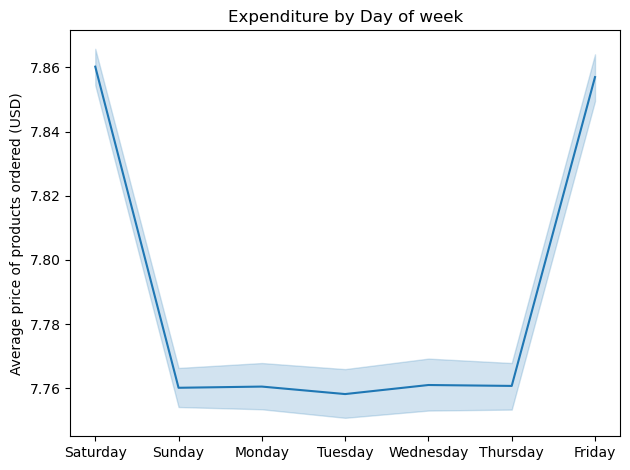

In [33]:
#Create a line chart of orders_day_of_week vs prices
line_orders_dow_vs_prices = sns.lineplot(data = df_sample, x = 'orders_day_of_week',y = 'prices')

# Define the labels for the days of the week
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Set the x-axis tick labels to the day names (use plt.xticks to correctly apply the labels)
plt.xticks(ticks = range(7), labels = day_labels)

#Set the title
plt.title('Expenditure by Day of week')

#Rename axis
plt.xlabel('')  
plt.ylabel('Average price of products ordered (USD)') 

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

## 4.5. Histogram (frequency - 'order_hour_of_day')

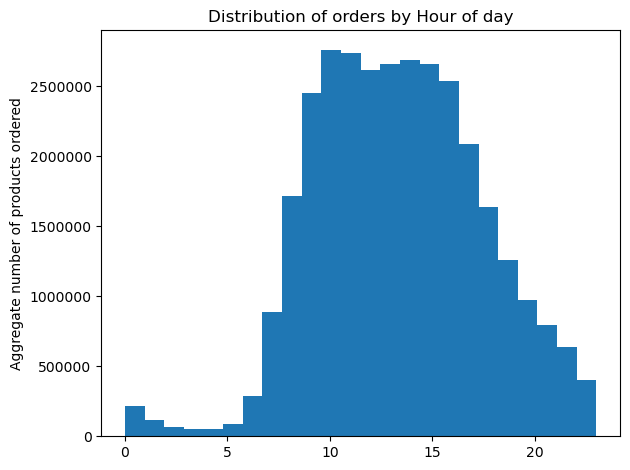

In [35]:
#Create histogram of order_hour_of_day
histogram_order_hod = df_final_merged['order_hour_of_day'].plot.hist(bins = 24)

#Set the title
plt.title('Distribution of orders by Hour of day')

#Rename axis
plt.xlabel('')
plt.ylabel('Aggregate number of products ordered')

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

##### The histogram demonstrates the distribution of orders across different hours of the day.
##### The majority of orders are placed between 9am and 4pm and peaks arond mid-morning. 
##### Orders drop significantly after that until late evening.
##### There is very little activity in the early hours of the morning. 
##### Orders have a normal distribution with most orders being placed during regular business hours.

## 4.6. Bar chart (frequency - 'loyalty_flag')

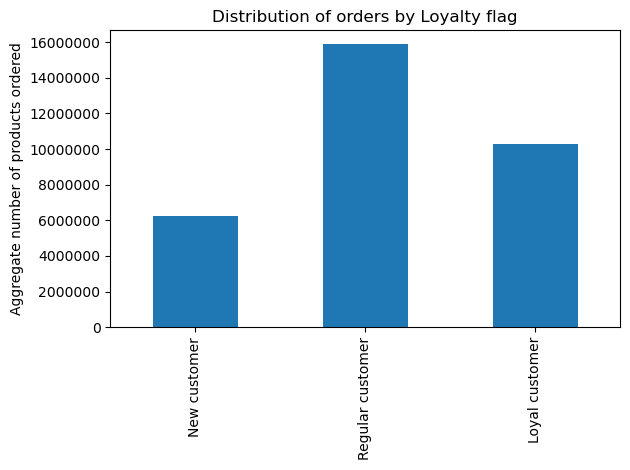

In [38]:
# Define the correct order for category
loyalty_order = ['New customer', 'Regular customer', 'Loyal customer']

# Convert 'age_profile' to categorical type with the specified order
df_final_merged['loyalty_flag'] = pd.Categorical(df_final_merged['loyalty_flag'], categories = loyalty_order, ordered=True)

#Create bar chart of loyalty flag frequency
bar_loyalty = df_final_merged['loyalty_flag'].value_counts().sort_index().plot.bar()

#Set the title
plt.title('Distribution of orders by Loyalty flag')

#Rename axis
plt.xlabel('') 
plt.ylabel('Aggregate number of products ordered') 

#Disable scientific notation on the y-axis
plt.ticklabel_format(style = 'plain', axis = 'y')

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

## 4.7. Line chart ('order_hour_of_day' vs 'prices')

In [40]:
#Reduce sample to necessary columns only
df_sample_2 = small[['order_hour_of_day','prices']]

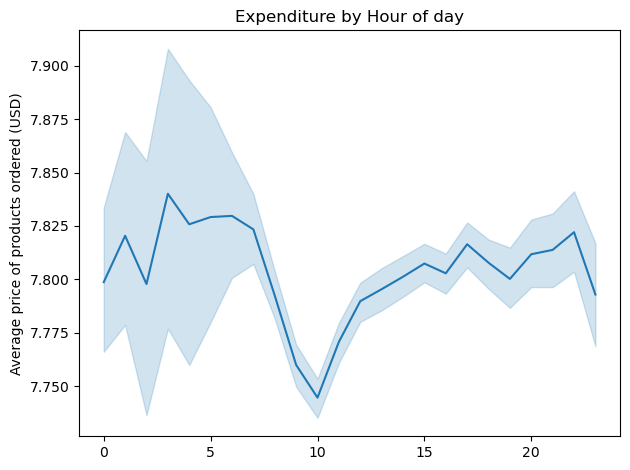

In [41]:
#Line Chart
line_order_hod_vs_prices = sns.lineplot(data = df_sample_2, x = 'order_hour_of_day',y = 'prices')

#Set the title
plt.title('Expenditure by Hour of day')

#Rename axis
plt.xlabel('') 
plt.ylabel('Average price of products ordered (USD)')  

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

## 4.8. Line chart ('age' vs 'number_of_dependents')

In [43]:
#Reduce sample to necessary columns only
df_sample_3 = small[['number_of_dependents','age']]

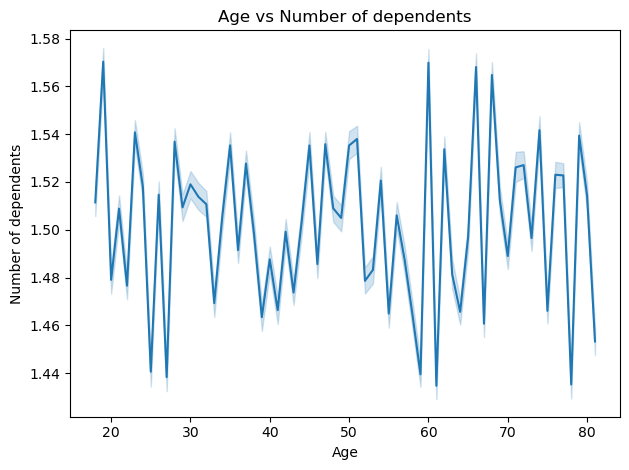

In [44]:
#Line Chart
line_age_number_dependents = sns.lineplot(data = df_sample_3, x = 'age' ,y = 'number_of_dependents')

#Set the title
plt.title('Age vs Number of dependents')

#Rename axis
plt.xlabel('Age') 
plt.ylabel('Number of dependents')  

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

##### The line chart shows the relationship between age and number of dependents. 
##### The number of dependents fluctuate significantly across different ages with no clear trend.
##### There are sharp peaks and valleys indicating variability in the number of dependents among individuals of similar age.
##### The chart suggest no relationship exists between age and family situation

## 4.9. Scatterplot ('age' vs 'income')

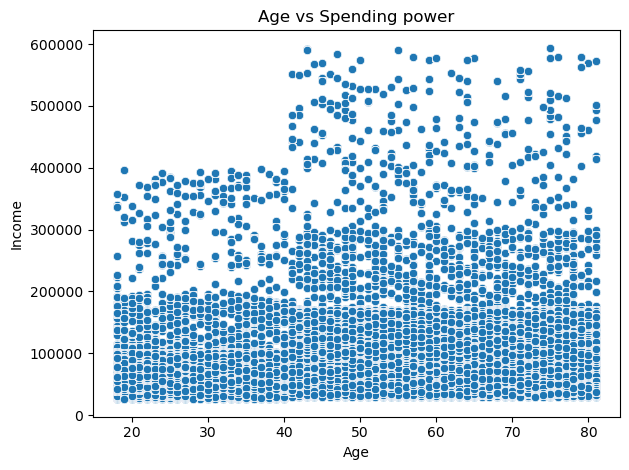

In [47]:
#Scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_final_merged)

#Set the title
plt.title('Age vs Spending power')

#Rename axis
plt.xlabel('Age') 
plt.ylabel('Income')  

#Fit chart to size
plt.tight_layout()

# Show the plot
plt.show()

##### The scatterplot illustrates the relationship between age and income.
##### The plot shows a wide range of income levels across all age groups.
##### There is no visibile correlation between age and level of income. 
##### The majority of data points are concentrated in the lower income. This increases from 200000 to 300000 for age groups above 40 and suggests a relatively stable income across age groups.
##### There is also income variability that increases to above 400000 at age 40.

# 5. Export charts

In [50]:
bar_orders_dow.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.1 - Distribution of orders by Day of week.png'))

In [51]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.2 - Distribution of Prices.png'))

In [52]:
histogram_prices.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.3 - Frequency distribution of Prices.png'))

In [53]:
line_orders_dow_vs_prices.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.4 - Expenditure by Day of week.png'))

In [54]:
histogram_order_hod.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.5 - Distribution of orders by Hour of day.png'))

In [55]:
bar_loyalty.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.6 - Distribution of orders by Loyalty flag.png'))

In [56]:
line_order_hod_vs_prices.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.7 - Expenditure by Hour of day.png'))

In [57]:
line_age_number_dependents.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.8 - Age vs Number of dependets.png'))

In [58]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 - Analysis','Visualisations', '09.9 - Age vs Spending power.png'))

# Task

## 1. Create notebook
Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

##### Notebook created

## 2. Charts
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

##### Refer: 4.1. Bar Chart (frequency - 'orders_day_of_week')
##### Refer: 4.2. Scatterplot (frequency 'prices')
##### Refer: 4.3. Histogram (frequency 'prices')
##### Refer: 4.4. Line chart ('orders_day_of_week' vs 'prices')

## 3. Histogram (order hour of day)
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

##### Refer: 4.5. Histogram (frequency - 'order_hour_of_day')

## 4. Bar chart (loyalty flag)
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

##### Refer: 4.6. Bar chart (frequency - 'loyalty_flag')

## 5. Line chart (hour of day)
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

##### Refer: 4.7. Line chart ('order_hour_of_day' vs 'prices')

## 6. Line chart (age vs number of dependents)
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

##### Refer: 4.8. Line chart ('age' vs 'number_of_dependents')

## 7. Scatterplot (age vs spending power)
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

##### Refer: 4.9. Scatterplot ('age' vs 'income')

## 8. Export visualisations
Export your visualizations as “.png” files in your relevant project folder.

##### Refer: 5. Export charts

## 9. Save notebook
Save your notebook from part 2 of this Exercise’s task

##### Notebook saved

## 10. Submit notebook
Submit your notebooks for both the first and second parts of this task to your tutor for review.

##### Notebook submitted